In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('dataset/Zameen Property Data.csv')

In [3]:
def pre_poccess1(dataset):
    
    ##adding indivdual where agency is not given
    dataset.loc[dataset['agency'].isnull(), 'agency'] = 'Individual'
    dataset.drop(['agent'], axis=1, inplace=True)

    #using the conversion of urban https://www.zameen.com/forum/discussions/other_and_misc/kanal__marla__square_feet__square_yards_conversion-12358.html
    converted_area = []
    for area in dataset['area']:
        if area.endswith('Marla'):
            #print("MARLA", str(area))
            converted_area.append(float(area.split()[0].replace(',', '')) * 500)
        if area.endswith('Kanal'):
            #print("Kanal", str(area))
            converted_area.append(float(area.split()[0].replace(',', '')) * 25)
            
    #print(converted_area)
    dataset['area'] = converted_area

    #creating unique location column
    dataset['unique_location'] = dataset['location'] + ' ' + dataset['city']

    # dividing price by area to get price per unit area
    dataset['price_per_area'] = dataset['price'] / dataset['area']

    # filtering out empty plots / commercial properties
    dataset['price_z_score'] = 0
    dataset = dataset[dataset['bedrooms'] != 0]

    print(len(dataset.index))
    # removing values outside of 95% interval
    dataset.loc[:, 'price_z_score'] = 0

    # for sales
    arr = np.array(dataset['price'][dataset['purpose'] == 'For Sale'])
    z_score = (dataset['price'][dataset['purpose'] == 'For Sale'] - np.mean(arr[np.isfinite(arr)])) / np.std(
        arr[np.isfinite(arr)])

    dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
    #dataset.loc[dataset['purpose'] == 'For Sale', 'prize_z_score'] = z_score

    # for rent
    arr = np.array(dataset['price'][dataset['purpose'] == 'For Rent'])
    z_score = (dataset['price'][dataset['purpose'] == 'For Rent'] - np.mean(arr[np.isfinite(arr)])) / np.std(
        arr[np.isfinite(arr)])

    dataset['price_z_score'][dataset['purpose'] == 'For Rent'] = z_score
    #dataset.loc[dataset['purpose'] == 'For Rent', 'prize_z_score'] = z_score

    ##dataset = dataset[(dataset['price_z_score'] < 3) and (dataset['price_z_score'] > -3)]
    dataset = dataset.drop(dataset[(dataset['price_z_score'] > 3) | (dataset['price_z_score'] < -3)].index)

    # changing date_added type to date
    dataset['date_added'] = dataset['date_added'].apply(pd.to_datetime, format='%m-%d-%Y')

    dataset = dataset.drop(columns = ['page_url', 'property_id', 'location_id'])

    print("pre-poccessed successfully.")
    
    return dataset

In [4]:
def pre_poccess(dataset):
    
    ##adding indivdual where agency is not given
    dataset.loc[dataset['agency'].isnull(), 'agency'] = 'Individual'
    dataset.drop(['agent'], axis=1, inplace=True)

    #using the conversion of urban https://www.zameen.com/forum/discussions/other_and_misc/kanal__marla__square_feet__square_yards_conversion-12358.html
    converted_area = []
    for area in dataset['area']:
        if area.endswith('Marla'):
            #print("MARLA", str(area))
            converted_area.append(float(area.split()[0].replace(',', '')) * 500)
        if area.endswith('Kanal'):
            #print("Kanal", str(area))
            converted_area.append(float(area.split()[0].replace(',', '')) * 25)
            
    #print(converted_area)
    dataset['area'] = converted_area

    #creating unique location column
    dataset['unique_location'] = dataset['location'] + ' ' + dataset['city']

    # dividing price by area to get price per unit area
    dataset['price_per_area'] = dataset['price'] / dataset['area']

    # filtering out empty plots / commercial properties
    dataset['price_z_score'] = 0
    dataset = dataset[dataset['bedrooms'] != 0]

    print(len(dataset.index))
    # removing values outside of 95% interval
    dataset.loc[:, 'price_z_score'] = 0

    # for sales
    arr = np.array(dataset['price_per_area'][dataset['purpose'] == 'For Sale'])
    z_score = (dataset['price_per_area'][dataset['purpose'] == 'For Sale'] - np.mean(arr[np.isfinite(arr)])) / np.std(
        arr[np.isfinite(arr)])

    dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
    #dataset.loc[dataset['purpose'] == 'For Sale', 'prize_z_score'] = z_score

    # for rent
    arr = np.array(dataset['price_per_area'][dataset['purpose'] == 'For Rent'])
    z_score = (dataset['price_per_area'][dataset['purpose'] == 'For Rent'] - np.mean(arr[np.isfinite(arr)])) / np.std(
        arr[np.isfinite(arr)])

    dataset['price_z_score'][dataset['purpose'] == 'For Rent'] = z_score
    #dataset.loc[dataset['purpose'] == 'For Rent', 'prize_z_score'] = z_score


    ##dataset = dataset[(dataset['price_z_score'] < 3) and (dataset['price_z_score'] > -3)]
    dataset = dataset.drop(dataset[(dataset['price_z_score'] > 3) | (dataset['price_z_score'] < -3)].index)

    # changing date_added type to date
    dataset['date_added'] = dataset['date_added'].apply(pd.to_datetime, format='%m-%d-%Y')
    print("date done")

    print(len(dataset.index))
    dataset = dataset.drop(columns = ['page_url', 'property_id', 'location_id'])

    print("pre-poccessed successfully.")
    
    return dataset

In [5]:
data = pre_poccess(dataset)
data.head(5)

145742


C:\Users\Huda\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Huda\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Huda\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace

date done
141985
pre-poccessed successfully.


,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,unique_location,price_per_area,price_z_score
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,2000.0,For Sale,2,2019-02-04,Individual,G-10 Islamabad,5000.000000,-0.363829
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,2800.0,For Sale,3,2019-05-04,Individual,E-11 Islamabad,2464.285714,-0.366420
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,4000.0,For Sale,5,2019-07-17,Individual,G-15 Islamabad,4125.000000,-0.364723
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,50.0,For Sale,4,2019-04-05,Individual,Bani Gala Islamabad,870000.000000,0.519814
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,4000.0,For Sale,3,2019-07-10,Easy Property,DHA Defence Islamabad,1750.000000,-0.367149


In [6]:
# data.drop(['price_per_area','price_z_score'], axis=1, inplace=True)

farm_indexNames = data[data['property_type'] == "Farm House"].index
data.drop(farm_indexNames , inplace=True)

pent_indexNames = data[data['property_type'] == "Penthouse"].index
data.drop(pent_indexNames , inplace=True)

room_indexNames = data[data['property_type'] == "Room"].index
data.drop(room_indexNames , inplace=True)

data_null = data.isna().sum()
print(data_null)

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
price_per_area     0
price_z_score      0
dtype: int64


In [7]:
numer = set(data.corr()['price'].index)
categ = list(set(data.columns) - set(data.corr()['price'].index))
print('numerical: ',numer)
print('categorical: ',categ)

data_log = data.copy()
# data_log = data_log[(data_log.T != 0).any()]
data_log = data_log [(data_log  != 0).all(1)]

for i in numer:
    data_log[i] = data_log[i].apply(np.log)
data_log.head(5)

print(data.city.unique())
data_isl = data[data['city'] == "Islamabad"]
data_lhr = data[data['city'] == "Lahore"]
data_fsl = data[data['city'] == "Faisalabad"]
data_rwl = data[data['city'] == "Rawalpindi"]
data_khi = data[data['city'] == "Karachi"]

numerical:  {'bedrooms', 'price', 'latitude', 'baths', 'price_per_area', 'longitude', 'area', 'price_z_score'}
categorical:  ['agency', 'date_added', 'province_name', 'unique_location', 'purpose', 'property_type', 'city', 'location']
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


In [9]:
def kmeans(input_data, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(input_data)
    km = KMeans(n_clusters=n_clusters)
    km.fit(input_data)
    y_pred = km.predict(input_data)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    ax.set_xlim(-3,3)
    ax.set_xlabel(input_data.columns[0])
    ax.set_ylabel(input_data.columns[1])
    ax.set_title("K-means")
    plt.colorbar(scatter)

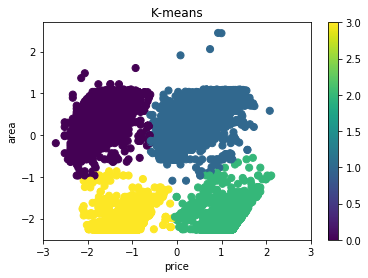

In [10]:
kmeans(data_log[['price', 'area']],4)

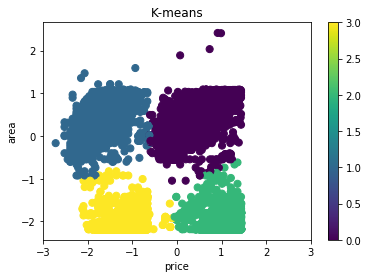

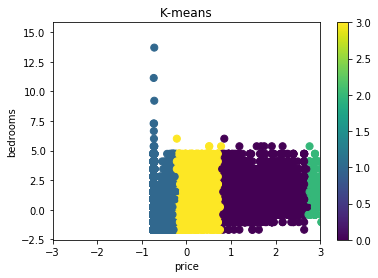

In [32]:
kmeans(data[['price', 'bedrooms']],4)

Islamabad
Lahore
Faisalabad
Rawalpindi
Karachi


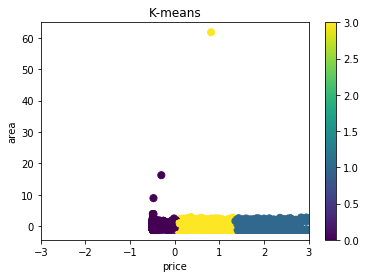

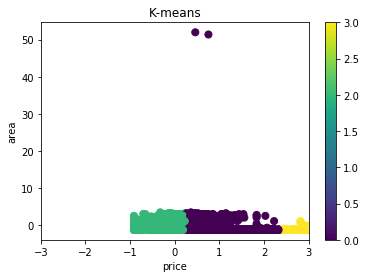

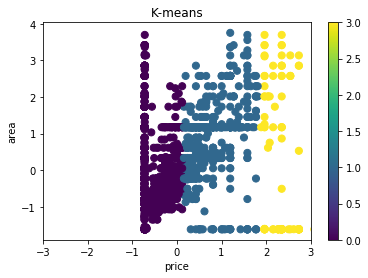

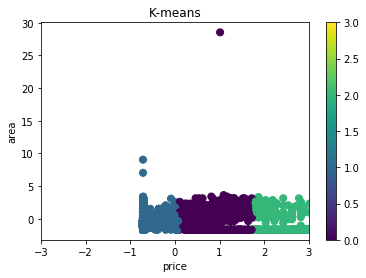

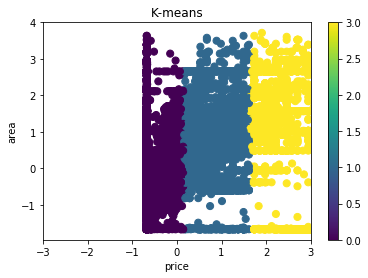

In [13]:
i = 0
cities = ['Islamabad','Lahore','Faisalabad','Rawalpindi','Karachi']

print(cities[i])
kmeans(data_isl[['price', 'area']],4)

i = i+1
print(cities[i])
kmeans(data_lhr[['price', 'area']],4)

i = i+1
print(cities[i])
kmeans(data_fsl[['price', 'area']],4)

i = i+1
print(cities[i])
kmeans(data_rwl[['price', 'area']],4)

i = i+1
print(cities[i])
kmeans(data_khi[['price', 'area']],4)

In [17]:
from sklearn.cluster import DBSCAN
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

In [ ]:
dbscan(data_isl[['price', 'area']],1,4)